In [4]:
!pip install tensorflow

     -------------------------------------- 300.9/300.9 MB 5.2 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 9.4 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 8.5 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 9.9 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 9.6 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 9.4 MB/s eta 0:00:00
     -------------------------------------- 442.0/442.0 kB 9.2 MB/s eta 0:00:00
     -------------------------------------- 133.7/133.7 kB 7.7 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     -------------------------------------- 938.6/938.6 kB 9.9 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB ? eta 0:00:00
     -------------------------------------- 151.7/151.7 kB 4.6 MB/s eta 0:00:00


In [5]:
!pip install numpy

In [6]:
!pip install matplotlib

In [4]:
from tensorflow.keras.layers import Input , Lambda , Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50 , preprocess_input
from tensorflow.keras.applications.resnet101 import ResNet101 , preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob 
import matplotlib.pyplot as plt 


ModuleNotFoundError: No module named 'tensorflow.keras.applications.resnet101'

In [5]:
import keras
print(keras.__version__)

3.0.0


In [6]:
IMAGE_SIZE = [224,224]

TrainFolder = "C:/Users/patel1637/DICEdataset/train"
ValidateFolder = "C:/Users/patel1637/DICEdataset/validate"

myResnet = keras.applications.ResNet101(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
) # include_top=False ==> remove the fully connected layer

print ( myResnet.summary() )

for layer in myResnet.layers:
    layer.trainable = False # we dont need to train the model . It is already trained

# classes 
Classes = glob('C:/Users/patel1637/DICEdataset/train/*') #dont forget the /*
print(Classes)

classesNum = len(Classes)
print(classesNum)

# continue with the next layers of the model :


179648224/179648224 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


Model: "resnet101"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃     Param # ┃ Connected to                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │           0 │ -                              │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │           0 │ input_layer[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │       9,472 │ conv1_pad[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │         256 │ conv1_conv[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │           0 │ conv1_bn[0][0]                 │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │           0 │ conv1_relu[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │           0 │ pool1_pad[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │       4,160 │ pool1_pool[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │         256 │ conv2_block1_1_conv[0][0]      │
│ (BatchNormalization)          │                           │             │                                │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │           0 │ conv2_block1_1_bn[0][0]        │
│ (Activation)                  │                           │             │                                │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │      36,928 │ conv2_block1_1_relu[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │         256 │ conv2_block1_2_conv[0][0]      │
│ (BatchNormalization)          │                           │             │                                │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │           0 │ conv2_block1_2_bn[0][0]        │
│ (Activation)                  │                           │             │                                │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │      16,640 │ pool1_pool[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │      16,640 │ conv2_block1_2_relu[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────┼─

 Total params: 44,707,176 (170.54 MB)

 Trainable params: 44,601,832 (170.14 MB)

 Non-trainable params: 105,344 (411.50 KB)

None
['C:/Users/patel1637/DICEdataset/train\\allnonpits', 'C:/Users/patel1637/DICEdataset/train\\allpits']
2


In [ ]:



IMAGE_SIZE = [224,224]

TrainFolder = "C:/Python-cannot-upload-to-GitHub/Cars/Train"
ValidateFolder = "C:/Python-cannot-upload-to-GitHub/Cars/Validate"

myResnet = ResNet50(input_shape= IMAGE_SIZE+[3] , weights='imagenet', include_top=False ) # include_top=False ==> remove the fully connected layer

print ( myResnet.summary() )

for layer in myResnet.layers:
    layer.trainable = False # we dont need to train the model . It is already trained

# classes 
Classes = glob('C:/Python-cannot-upload-to-GitHub/Cars/Train/*') #dont forget the /*
print(Classes)

classesNum = len(Classes)
print(classesNum)

# continue with the next layers of the model :

# add Flatten layer 
PlusFlattenlayer = Flatten()(myResnet.output)

# add a Dense layer with our classes 
prediction = Dense(classesNum, activation='softmax')(PlusFlattenlayer)


# create the model amd add tje mew layers 

model = Model(inputs=myResnet.input , outputs=prediction)

print (model.summary())         

# compile the model

model.compile(
    loss = 'categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])


# images augmentaion

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale= 1. /255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. /255)

training_set = train_datagen.flow_from_directory(TrainFolder, target_size=(224,224),batch_size=32,class_mode='categorical')
test_set = test_datagen.flow_from_directory(ValidateFolder,target_size=(224,224),batch_size=32,class_mode='categorical')

# fit the model
result = model.fit(training_set ,
    validation_data=test_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set))

# plot the result

# plot the accuracy
plt.plot(result.history['accuracy'],label='train_acc')
plt.plot(result.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

#plot the loss
plt.plot(result.history['loss'],label='train_loss')
plt.plot(result.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

# save the model
model.save('C:/Python-cannot-upload-to-GitHub/Cars/myCarsModel.h5')







In [ ]:


IMAGE_SIZE = [224, 224]

TrainFolder = "C:/Users/patel1637/DICEdataset/train"
ValidateFolder = "C:/Users/patel1637/DICEdataset/validate"

myResnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in myResnet.layers:
    layer.trainable = False  # we don't need to train the model. It is already trained

# classes
Classes = glob('C:/Users/patel1637/DICEdataset/train/*')  # don't forget the /*
print(Classes)

classesNum = len(Classes)
print(classesNum)

# continue with the next layers of the model:
# add Flatten layer
PlusFlattenlayer = Flatten()(myResnet.output)

# add a Dense layer with our classes
prediction = Dense(classesNum, activation='softmax')(PlusFlattenlayer)

# create the model and add the new layers
model = Model(inputs=myResnet.input, outputs=prediction)

print(model.summary())

# compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# Load and preprocess images without augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

training_set = train_datagen.flow_from_directory(TrainFolder, target_size=(1280, 1280), batch_size=32, class_mode='categorical')
test_set = test_datagen.flow_from_directory(ValidateFolder, target_size=(1280, 1280), batch_size=32, class_mode='categorical')

# fit the model
result = model.fit(training_set,
                   validation_data=test_set,
                   epochs=50,
                   steps_per_epoch=len(training_set),
                   validation_steps=len(test_set))

# plot the result
# plot the accuracy
plt.plot(result.history['accuracy'], label='train_acc')
plt.plot(result.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

# plot the loss
plt.plot(result.history['loss'], label='train_loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# save the model
model.save('C:/Python-cannot-upload-to-GitHub/Cars/myPitsModel.h5')


['C:/Users/patel1637/DICEdataset/train\\allnonpits', 'C:/Users/patel1637/DICEdataset/train\\allpits']
2
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 1280, 1280, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 1286, 1286, 3)        0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 640, 640, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 640, 640, 64)         256       ['conv1_conv[0][0]'] 

 on)                                                                                              
                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 320, 320, 64)         16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 320, 320, 64)         256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 320, 320, 64)         0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
          

 conv3_block2_2_relu (Activ  (None, 160, 160, 128)        0         ['conv3_block2_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 160, 160, 512)        66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 160, 160, 512)        2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 160, 160, 512)        0         ['conv3_block1_out[0][0]',    
          

                                                                                                  
 conv4_block1_2_conv (Conv2  (None, 80, 80, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 80, 80, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 80, 80, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_blo

                                                                     'conv4_block3_3_bn[0][0]']   
                                                                                                  
 conv4_block3_out (Activati  (None, 80, 80, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 80, 80, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 80, 80, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
          

 conv4_block6_3_conv (Conv2  (None, 80, 80, 1024)         263168    ['conv4_block6_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 80, 80, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 80, 80, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 80, 80, 1024)         0         ['conv4_block6_add[0][0]']    
 on)      

                                                                                                  
 conv5_block3_1_relu (Activ  (None, 40, 40, 512)          0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 40, 40, 512)          2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 40, 40, 512)          2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_blo

Epoch 30/50
57/57 [==============================] - 4875s 85s/step - loss: 43.9200 - accuracy: 0.7129 - val_loss: 305.0300 - val_accuracy: 0.5051
Epoch 31/50
57/57 [==============================] - 4653s 81s/step - loss: 54.2009 - accuracy: 0.6870 - val_loss: 82.7272 - val_accuracy: 0.5152
Epoch 32/50
57/57 [==============================] - 5675s 100s/step - loss: 104.4266 - accuracy: 0.6375 - val_loss: 230.5843 - val_accuracy: 0.5152
Epoch 33/50
57/57 [==============================] - 6316s 111s/step - loss: 107.0568 - accuracy: 0.6249 - val_loss: 136.4509 - val_accuracy: 0.5657
Epoch 34/50
57/57 [==============================] - 6485s 114s/step - loss: 51.2023 - accuracy: 0.7030 - val_loss: 71.7024 - val_accuracy: 0.6010
Epoch 35/50
57/57 [==============================] - 5149s 90s/step - loss: 38.9290 - accuracy: 0.7250 - val_loss: 223.9516 - val_accuracy: 0.4899
Epoch 36/50
57/57 [==============================] - 4961s 87s/step - loss: 83.5387 - accuracy: 0.7035 - val_loss: 

In [5]:
!pip install opencv-python

     ---------------------------------------- 38.6/38.6 MB 7.7 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
import cv2

from keras.preprocessing import image
from keras.preprocessing.image import load_img , img_to_array
import numpy as np


In [2]:

categories = ['nonpit','pit']

#load the model

model = tf.keras.models.load_model('C:/Python-cannot-upload-to-GitHub/Cars/myPitsModel.h5')
#print (model.summary())

# lets create a function to prepare the image for the prediction

def preprareImage(PathForImage):
    image = load_img(PathForImage, target_size=(1280,1280))
    imgResult = img_to_array(image)
    imgResult = np.expand_dims(imgResult, axis = 0)
    imgResult = imgResult / 255.
    return imgResult

#testImage = "C:/Python-cannot-upload-to-GitHub/Cars/Test/Audi_006.jpg"
testImage = "C:/Users/patel1637/nonpit1/nonpitImage_0_50.3274698_-110.2570905.png"
#testImage = "C:/Users/patel1637/pitdata3/image_4.png"
#testImage = "C:/Users/patel1637/nonpit1/nonpitImage_0_49.5782348_-111.8720933.png"
#testImage = "C:/Users/patel1637/DICEdataset/test/allnonpits/nonpitImage_0_57.18160291_-111.113161.png"

imgForModel = preprareImage(testImage)
resultArray = model.predict(imgForModel, verbose=1)
answer = np.argmax(resultArray, axis=1)
print("***************************** : ")
print(answer)
print("***************************** : ")
index = answer[0]

print("The predicted answer is : "+ categories[index])

# show the image :

img = cv2.imread(testImage)
cv2.putText(img,categories[index] , (10,100), cv2.FONT_HERSHEY_COMPLEX , 1.6 , (255,0,0), 3, cv2.LINE_AA)
cv2.imshow('image', img)
cv2.waitKey(0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
***************************** : 
[0]
***************************** : 
The predicted answer is : nonpit


-1

In [8]:
import os

categories = ['nonpit','pit']


def preprareImage(PathForImage):
    image = load_img(PathForImage, target_size=(1280,1280))
    imgResult = img_to_array(image)
    imgResult = np.expand_dims(imgResult, axis = 0)
    imgResult = imgResult / 255.
    return imgResult

model = tf.keras.models.load_model('C:/Python-cannot-upload-to-GitHub/Models/resnet101.h5')


# Path to the directory containing allnonpits images
folder_path = "C:/Users/patel1637/DICEdataset/train/Non_Pit"
#C:\Users\patel1637\AddPitSmall
# List all files in the directory
image_files = os.listdir(folder_path)

# Loop through each image file
for image_file in image_files:
    # Construct the full path for the image
    image_path = os.path.join(folder_path, image_file)
    
    # Prepare the image for prediction
    imgForModel = preprareImage(image_path)
    
    # Predict using the model
    resultArray = model.predict(imgForModel, verbose=1)
    
    # Get the predicted category
    answer = np.argmax(resultArray, axis=1)
    index = answer[0]
    
    # Print the predicted category
    print("***************************** : ")
    print("Image:", image_file)
    print("Predicted category:", categories[index])
    print("***************************** : ")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
***************************** : 
Image: pitImage_49.0582241_-113.7150728.png
Predicted category: nonpit
***************************** : 
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
***************************** : 
Image: pitImage_49.1865802_-113.7309784.png
Predicted category: nonpit
***************************** : 
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
***************************** : 
Image: pitImage_49.187687_-113.733499.png
Predicted category: nonpit
***************************** : 
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
***************************** : 
Image: pitImage_49.1931795_-113.9964296.png
Predicted category: nonpit
***************************** : 
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
***************************** : 
Image: pitImage_50.7507676_-110.5989456.png
Predicted category: nonpit
***************************** : 
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
***************************** : 
Image: pitImage_50.7508083_-110.9757386.png
Predicted category: nonp

KeyboardInterrupt: 

In [1]:
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\patel1637\AppData\Local\Temp\pip-install-vxshn1su\tensorflow-gpu_f2339f5ba39e448c9f05770e16bdc167\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did

['C:/Users/patel1637/DICEdataset/train\\Non_Pit', 'C:/Users/patel1637/DICEdataset/train\\Pit']
2


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃     Param # ┃ Connected to                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)    │ (None, 224, 224, 3)       │           0 │ -                              │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │           0 │ input_layer_3[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │       9,472 │ conv1_pad[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │         256 │ conv1_conv[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │           0 │ conv1_bn[0][0]                 │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │           0 │ conv1_relu[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │           0 │ pool1_pad[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │       4,160 │ pool1_pool[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │         256 │ conv2_block1_1_conv[0][0]      │
│ (BatchNormalization)          │                           │             │                                │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │           0 │ conv2_block1_1_bn[0][0]        │
│ (Activation)                  │                           │             │                                │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │      36,928 │ conv2_block1_1_relu[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │         256 │ conv2_block1_2_conv[0][0]      │
│ (BatchNormalization)          │                           │             │                                │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │           0 │ conv2_block1_2_bn[0][0]        │
│ (Activation)                  │                           │             │                                │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │      16,640 │ pool1_pool[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │      16,640 │ conv2_block1_2_relu[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────┼─

 Total params: 44,709,178 (170.55 MB)

 Trainable params: 2,002 (7.82 KB)

 Non-trainable params: 44,707,176 (170.54 MB)

None
Found 1396 images belonging to 2 classes.
Found 198 images belonging to 2 classes.
Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 200s 4s/step - accuracy: 0.4923 - loss: 0.6932 - val_accuracy: 0.4949 - val_loss: 0.6947
Epoch 2/50


C:\Users\patel1637\AppData\Local\anaconda3\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 181s 4s/step - accuracy: 0.5265 - loss: 0.6920 - val_accuracy: 0.4949 - val_loss: 0.6939
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 135s 3s/step - accuracy: 0.5262 - loss: 0.6917 - val_accuracy: 0.4949 - val_loss: 0.6955
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.5148 - loss: 0.6925 - val_accuracy: 0.4949 - val_loss: 0.6926
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 118s 3s/step - accuracy

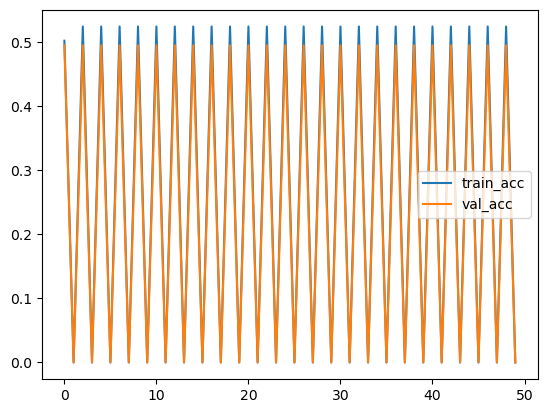

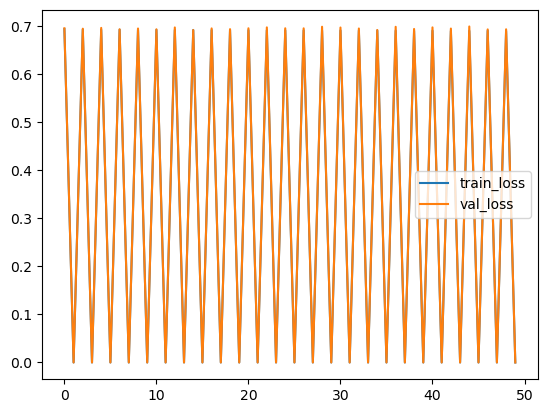

C:\Users\patel1637\AppData\Local\anaconda3\lib\site-packages\keras\src\models\model.py:342: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  warnings.warn(


In [9]:
IMAGE_SIZE = [224, 224]

TrainFolder = "C:/Users/patel1637/DICEdataset/train"
ValidateFolder = "C:/Users/patel1637/DICEdataset/validate"

myResnet = keras.applications.ResNet101(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classifier_activation="softmax",
) # include_top=False ==> remove the fully connected layer


for layer in myResnet.layers:
    layer.trainable = False  # we don't need to train the model. It is already trained

# classes
Classes = glob('C:/Users/patel1637/DICEdataset/train/*')  # don't forget the /*
print(Classes)

classesNum = len(Classes)
print(classesNum)

# continue with the next layers of the model:
# add Flatten layer
PlusFlattenlayer = Flatten()(myResnet.output)

# add a Dense layer with our classes
prediction = Dense(classesNum, activation='softmax')(PlusFlattenlayer)

# create the model and add the new layers
model = Model(inputs=myResnet.input, outputs=prediction)

print(model.summary())

# compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# Load and preprocess images without augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

training_set = train_datagen.flow_from_directory(TrainFolder, target_size=(224, 224), batch_size=32, class_mode='categorical')
test_set = test_datagen.flow_from_directory(ValidateFolder, target_size=(224, 224), batch_size=32, class_mode='categorical')

# fit the model
result = model.fit(training_set,
                   validation_data=test_set,
                   epochs=50,
                   steps_per_epoch=len(training_set),
                   validation_steps=len(test_set))

# plot the result
# plot the accuracy
plt.plot(result.history['accuracy'], label='train_acc')
plt.plot(result.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

# plot the loss
plt.plot(result.history['loss'], label='train_loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# save the model
model.save('C:/Python-cannot-upload-to-GitHub/Models/newResnet101.h5')
